In [1]:
#----------------------------------- Data Handling 
# 데이터가 없을 때 할 수 있는 전략
# 데이터가 없으면 sample 을 drop
# 데이터가 없는 최소개수를 정해서 sample을 drop
# 데이터가 거의 없는 feature는 feature 자체를 drop
# 최빈값, 평균값으로 비어있는 데이터를 채우기
import pandas as pd
import numpy as np

In [4]:
# Eaxmple from - https://chrisalbon.com/python/pandas_missing_data.html
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [6]:
#결측값 확인
df.isnull().sum()
#df.isnull().sum() / len(df) 

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

In [7]:
#결측값 제거
df_no_missing = df.dropna()
df_no_missing

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [8]:
df # 원본은 안건드는게 좋다 건들려면 옵션 df.dropna(inplace=True) 를 통해서 제거하면 되지만 그럴려면 deepcopy를 실행해야함

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [9]:
df_cleaned = df.dropna(how='all') # how='all' 일 경우는 데이터가 전부다 비어 있을 경우에만 제거
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [10]:
df['location'] = np.nan # location feature 추가 NaN 값으로
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [11]:
df.dropna(axis=1, how='all') # 컬럼을 기준으로 전부 비어있는것 제거

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [12]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [13]:
df.dropna(axis=0, thresh=1) # thresh =1 인것은 데이터가 최소 2개 이상 없을 때 drop

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [15]:
df.dropna(thresh=3) # 데이터 값이 최소 4개이상 없으면 삭제 default 는 행을 기준으로 데이터 개수를 셈

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [16]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [17]:
# 빈 값 채우기 , 이 경우 Feature의 형태를 보면서 무엇으로 채울지 고민하면서 채울것 
df.fillna(0) #na 값을 0으로 채워라

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


In [18]:
df["preTestScore"].mean() #평균 

3.0

In [19]:
df["postTestScore"].median() # 중앙값

62.0

In [20]:
df["postTestScore"].mode() #최빈값

0    25.0
1    62.0
2    70.0
dtype: float64

In [21]:
df["preTestScore"] 

0    4.0
1    NaN
2    NaN
3    2.0
4    3.0
Name: preTestScore, dtype: float64

In [22]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True) # inplace = True 를 통해 df를 직접 변경

In [23]:
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [24]:
df.groupby("sex")["postTestScore"].transform("mean")

0    43.5
1     NaN
2    70.0
3    43.5
4    70.0
Name: postTestScore, dtype: float64

In [25]:
df["postTestScore"].fillna(
    df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df #성별을 기준으로 평균 값들을 postTestScore 값에 넣음

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [26]:
df[df['age'].notnull() & df['sex'].notnull()] # 불린 인덱스로 NaN 값을 거르기

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [27]:
# -----------------------------------------------categorical data
# one- hot 인코딩 ( Pandas 사용법과 Scikit-learn 사용법)
# 실제 데이터 set의 크기만큼 BInary Featrue 를 생성
import pandas as pd
import numpy as np

In [28]:
edges = pd.DataFrame({'source': [0, 1, 2], 
                   'target': [2, 2, 3],
                       'weight': [3, 4, 5],
                       'color': ['red', 'blue', 'blue']})

edges

,source,target,weight,color
0,0,2,3,red
1,1,2,4,blue
2,2,3,5,blue


In [29]:
edges.dtypes # color 가 object 임을 확인

source     int64
target     int64
weight     int64
color     object
dtype: object

In [30]:
edges["color"]

0     red
1    blue
2    blue
Name: color, dtype: object

In [31]:
pd.get_dummies(edges) #pd.get_dummies 를 사용하면 카테고리 컬 데이터가 자연스럽게 더미변수로 변환

,source,target,weight,color_blue,color_red
0,0,2,3,0,1
1,1,2,4,1,0
2,2,3,5,1,0


In [32]:
pd.get_dummies(edges["color"])

,blue,red
0,0,1
1,1,0
2,1,0


In [33]:
pd.get_dummies(edges[["color"]])

,color_blue,color_red
0,0,1
1,1,0
2,1,0


In [34]:
weight_dict = {3:"M", 4:"L", 5:"XL"}
edges["weight_sign"] = edges["weight"].map(weight_dict)
edges

,source,target,weight,color,weight_sign
0,0,2,3,red,M
1,1,2,4,blue,L
2,2,3,5,blue,XL


In [35]:
weight_sign = pd.get_dummies(edges["weight_sign"])
weight_sign

,L,M,XL
0,0,1,0
1,1,0,0
2,0,0,1


In [36]:
pd.concat([edges, weight_sign], axis=1)

,source,target,weight,color,weight_sign,L,M,XL
0,0,2,3,red,M,0,1,0
1,1,2,4,blue,L,1,0,0
2,2,3,5,blue,XL,0,0,1


In [37]:
pd.get_dummies(edges).values

array([[0, 2, 3, 0, 1, 0, 1, 0],
       [1, 2, 4, 1, 0, 1, 0, 0],
       [2, 3, 5, 1, 0, 0, 0, 1]], dtype=int64)

In [38]:
# -------------------------------------------------Data binning 
# 데이터의 구간을 나누는 것 
# Example from - https://chrisalbon.com/python/pandas_binning_data.html

raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [39]:
bins = [0, 25, 50, 75, 100] # Define bins as 0 to 25, 25 to 50, 60 to 75, 75 to 100
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names) #cut 을 사용해서 구간을 나눔 
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: postTestScore, dtype: category
Categories (4, object): [Low < Okay < Good < Great]

In [40]:
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
pd.value_counts(df['categories']) #빈도 체크

Good     8
Great    2
Low      2
Okay     0
Name: categories, dtype: int64

In [41]:
pd.get_dummies(df)

,preTestScore,postTestScore,regiment_Dragoons,regiment_Nighthawks,regiment_Scouts,company_1st,company_2nd,name_Ali,name_Cooze,name_Jacobson,...,name_Milner,name_Piger,name_Riani,name_Ryaner,name_Sloan,name_Sone,categories_Low,categories_Okay,categories_Good,categories_Great
0,4,25,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24,94,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,31,57,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,62,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,3,70,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,4,25,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,24,94,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,31,57,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
8,2,62,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
9,3,70,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [42]:
# -----------------------------------Using Scikit-learn preprocessing
raw_example = df.as_matrix()
raw_example[:3]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [49]:
data = raw_example.copy()

array([['Nighthawks', '1st', 'Miller', 4, 25, 'Low'],
       ['Nighthawks', '1st', 'Jacobson', 24, 94, 'Great'],
       ['Nighthawks', '2nd', 'Ali', 31, 57, 'Good'],
       ['Nighthawks', '2nd', 'Milner', 2, 62, 'Good'],
       ['Dragoons', '1st', 'Cooze', 3, 70, 'Good'],
       ['Dragoons', '1st', 'Jacon', 4, 25, 'Low'],
       ['Dragoons', '2nd', 'Ryaner', 24, 94, 'Great'],
       ['Dragoons', '2nd', 'Sone', 31, 57, 'Good'],
       ['Scouts', '1st', 'Sloan', 2, 62, 'Good'],
       ['Scouts', '1st', 'Piger', 3, 70, 'Good'],
       ['Scouts', '2nd', 'Riani', 2, 62, 'Good'],
       ['Scouts', '2nd', 'Ali', 3, 70, 'Good']], dtype=object)

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #preprocessing 중 LabelEncoder 라는 함수 사용

In [45]:
raw_example[:,0] # 각 카테고리를 인코딩 할 것임

array(['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons',
       'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts',
       'Scouts'], dtype=object)

In [50]:
le.fit(raw_example[:,0]) # fit으로 라벨 인코딩 진행

LabelEncoder()

In [53]:
le.classes_ # ' _ '주의 

array(['Dragoons', 'Nighthawks', 'Scouts'], dtype=object)

In [54]:
le.transform(raw_example[:,0]) #  Fit 이 먼저 선행이되고난 후 transform 진행 해야함 (Fit이 기준임)

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2], dtype=int64)

In [55]:
data[:,0] = le.transform(raw_example[:,0]) #라벨 인코딩 된 값을 원래 data에서 변환
data[:3]

array([[1, '1st', 'Miller', 4, 25, 'Low'],
       [1, '1st', 'Jacobson', 24, 94, 'Great'],
       [1, '2nd', 'Ali', 31, 57, 'Good']], dtype=object)

In [56]:
label_column = [0,1,2,5]
label_enconder_list = []
for column_index in  label_column:
    le = preprocessing.LabelEncoder()
    le.fit(raw_example[:,column_index])
    data[:,column_index] = le.transform(raw_example[:,column_index])
    label_enconder_list.append(le)
    del le 
data[:3]

array([[1, 0, 4, 4, 25, 2],
       [1, 0, 2, 24, 94, 1],
       [1, 1, 0, 31, 57, 0]], dtype=object)

In [57]:
label_enconder_list[0].transform(raw_example[:10,0])

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2], dtype=int64)

In [58]:
one_hot_enc = preprocessing.OneHotEncoder() # OneHotEncoder() 함수로 바로 적용
data[:,0].reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [59]:
one_hot_enc.fit(data[:,0].reshape(-1,1))

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [60]:
one_hot_enc.n_values_

array([3])

In [61]:
one_hot_enc.active_features_

array([0, 1, 2], dtype=int64)

In [62]:
data[:,0].reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2]], dtype=object)

In [63]:
onehotlabels = one_hot_enc.transform(data[:,0].reshape(-1,1)).toarray()
onehotlabels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [64]:
# -------------------------------------- Scailing
# min -max  normalization
# code from - https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
# 0~1 사이로 값을 변환함
import pandas as pd
import numpy as np

df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [65]:
df["A"]

0    14.00
1    90.20
2    90.95
3    96.27
4    91.21
Name: A, dtype: float64

In [66]:
df["A"]  - df["A"].min()

0     0.00
1    76.20
2    76.95
3    82.27
4    77.21
Name: A, dtype: float64

In [67]:
( df["A"] - df["A"].min() ) / (df["A"].max() - df["A"].min())

0    0.000000
1    0.926219
2    0.935335
3    1.000000
4    0.938495
Name: A, dtype: float64

In [68]:
df["A"] = ( df["A"] - df["A"].min() )  \
/ (df["A"].max() - df["A"].min()) * (5 - 1) + 1
df

,A,B,C
0,1.000000,103.02,big
1,4.704874,107.26,small
2,4.741339,110.35,big
3,5.000000,114.23,small
4,4.753981,114.68,small


In [69]:
# 표준 정규화 
df["B"].mean(), df["B"].std()

(109.90799999999999, 4.901619120249964)

In [70]:
df["B"] = ( df["B"] - df["B"].mean() )  \
/ (df["B"].std() )

In [71]:
df

,A,B,C
0,1.000000,-1.405250,big
1,4.704874,-0.540230,small
2,4.741339,0.090174,big
3,5.000000,0.881749,small
4,4.753981,0.973556,small


In [74]:
def feture_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [75]:
df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


In [76]:
feture_scaling(df,column=["A","B"])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


In [77]:
# Feature scailing with sklearn
# code from - http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [78]:
df = feture_scaling(df, "min-max", column=['Alcohol', 'Malic acid'])
df.head()

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613


In [79]:
from sklearn import preprocessing

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
     usecols=[0,1,2]
    )
df.columns=['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
5,1,14.20,1.76
6,1,14.39,1.87
7,1,14.06,2.15
8,1,14.83,1.64
9,1,13.86,1.35


In [80]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])

In [81]:
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])

In [82]:
df_std

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

In [83]:
minmax_scaler = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])

In [86]:
df_minmax=minmax_scaler.transform(df[['Alcohol', 'Malic acid']])

In [88]:
df_minmax[:3]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ]])

In [1]:
#-------------------------------------------------------Kaggle
# Titanic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data 
test_df = pd.read_csv("./test.csv")
train_df = pd.read_csv("./train.csv")

In [3]:
train_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
test_df.head(1) #test data 에는 y(survived) 값이 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
train_df.set_index('PassengerId', inplace=True) # passengerId 로 인덱스 수정
test_df.set_index('PassengerId', inplace=True)

In [6]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
test_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [8]:
train_index = train_df.index
test_index = test_df.index # index 값만 따로 추출 (나중에 다시 return 해주기 위함)

In [9]:
y_train_df = train_df.pop("Survived") #pop 을 통해 y 값 뽑아냄

In [10]:
y_train_df.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

In [11]:
# --------------------------------Data preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x) #소수점 두자리까지만 표현을 하라고 셋팅

In [16]:
test_df.isnull().sum() / len(test_df) * 100 #cabin 은 '짐'을 말함

Pclass      0.00
Name        0.00
Sex         0.00
Age        20.57
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.24
Cabin      78.23
Embarked    0.00
dtype: float64

In [15]:
train_df.isnull().sum() / len(train_df) * 100 #train 도 마찬가지로 cabin 이 결측값이 많음

Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

In [17]:
# Decision 1 - drop cabin
del test_df["Cabin"]
del train_df["Cabin"]

In [18]:
all_df = train_df.append(test_df) #전처리는 같은 방법으로 진행해야 하기 때문에 데이터를 합침
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
6,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,Q
7,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,S
8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,S


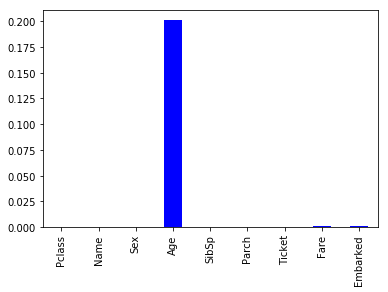

In [22]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar',color='blue') # bar plot 을 사용하여 결측값을 확인 
plt.show() # 20% 정도 결측값이 보임

In [23]:
len(all_df)

1309

In [24]:
del all_df["Name"] #name 삭제

In [25]:
del all_df["Ticket"] #ticket 삭제

In [26]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


In [27]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1}) # 원핫 인코딩 진행

In [28]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [29]:
all_df["Embarked"].unique() #embarked 는 어느항구에서 출발 했는가

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99}) # 값을 인코딩을 다시함

In [31]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99], dtype=int64)

In [32]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [33]:
pd.get_dummies(all_df["Embarked"], prefix="embarked") # 더미화

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


In [34]:
matrix_df = pd.merge(
    all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"), 
    left_index=True, right_index=True)
matrix_df.head() # 더미변수화 merge

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0


In [35]:
matrix_df.corr() #상관계수

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


In [36]:
all_df.groupby("Pclass")["Age"].mean() # Pclass는 좌석을 의미함 1은 1등석

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [40]:
all_df.groupby("Sex")["Age"].mean() #성별은 나이가 큰 차이가 없어 보임

Sex
0   30.59
1   28.69
Name: Age, dtype: float64

In [41]:
# all_df.loc[]  평균값으로 대체하기 위해서 Pclass 가 1이고 나이가 NaN값인 사람을 추출
all_df.loc[ 
    (all_df["Pclass"] == 1) & (all_df["Age"].isnull()) , "Age"]

PassengerId
32     nan
56     nan
65     nan
167    nan
169    nan
186    nan
257    nan
271    nan
285    nan
296    nan
299    nan
307    nan
335    nan
352    nan
376    nan
458    nan
476    nan
508    nan
528    nan
558    nan
603    nan
634    nan
670    nan
712    nan
741    nan
767    nan
794    nan
816    nan
840    nan
850    nan
914    nan
933    nan
1038   nan
1040   nan
1060   nan
1083   nan
1097   nan
1158   nan
1182   nan
Name: Age, dtype: float64

In [42]:
# 평균 값으로 NaN 값 대체
all_df.loc[(all_df["Pclass"] == 1) & (
        all_df["Age"].isnull()), "Age"] = 39.16
all_df.loc[ (
    all_df["Pclass"] == 2) & all_df["Age"].isnull() , "Age"] = 29.51
all_df.loc[ ( all_df["Pclass"] == 3) & all_df["Age"].isnull(), "Age"] = 24.82

In [43]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
all_df.groupby("Pclass")["Fare"].mean()

In [44]:
all_df[all_df["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.50,0,0,nan,0


In [45]:
all_df.loc[all_df["Fare"].isnull(),"Fare"]= 13.30 #평균값으로 대체

In [46]:
del all_df["Embarked"]

In [47]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A",2:"B",3:"C"})

In [48]:
all_df = pd.get_dummies(all_df)
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1
2,1,38.00,1,0,71.28,1,0,0
3,1,26.00,0,0,7.92,0,0,1
4,1,35.00,1,0,53.10,1,0,0
5,0,35.00,0,0,8.05,0,0,1


In [49]:
all_df = pd.merge(
    all_df, matrix_df[["embarked_0", "embarked_1", "embarked_2", "embarked_99"]], 
    left_index=True, right_index=True)

In [50]:
train_df = all_df[all_df.index.isin(train_index)] # 전처리 후 isin을 사용해서 원래 train 과 test 로 다시 나눔
test_df = all_df[all_df.index.isin(test_index)]

In [51]:
train_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,1,1,0,0,0


In [52]:
test_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,1,0
893,1,47.00,1,0,7.00,0,0,1,1,0,0,0
894,0,62.00,0,0,9.69,0,1,0,0,0,1,0


In [53]:
# Build Model
x_data = train_df.as_matrix() # matrix 로 변환
y_data = y_train_df.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [55]:
y_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [56]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data,y_data) # 로지스틱 모델 수행

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
cls.intercept_ # 절편

array([0.18829674])

In [58]:
cls.coef_ # 회귀계수

array([[ 2.60750665e+00, -4.07586678e-02, -3.25647165e-01,
        -8.49180077e-02,  2.48637600e-03,  1.11465026e+00,
         1.52999437e-01, -1.07935295e+00, -2.45258166e-01,
         1.66095755e-01,  6.65916090e-02,  2.00867547e-01]])

In [59]:
cls.predict(test_df.values) # 예측

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [62]:
x_test = test_df.as_matrix()
y_test =cls.predict(x_test)
y_test

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
result = np.concatenate( (test_index.values.reshape(-1,1),
                 cls.predict(x_test).reshape(-1,1)  ) , axis=1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]], dtype=int64)

In [64]:
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submssion

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [65]:
df_submssion.to_csv("submission_result.csv",index=False)